In [232]:
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
names = ['CLASS','Alcohol',
'Malic acid',
'Ash',
'Alcalinity of ash' ,
'Magnesium',
'Total phenols',
'Flavanoids',
'Nonflavanoid phenols',
'Proanthocyanins',
'Color intensity',
'Hue',
'OD280/OD315 of diluted wines',
'Proline']   

In [19]:
data = pd.read_csv('wine.data', names = names)

In [21]:
data.isna().sum()

CLASS                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [23]:
data.head()

,CLASS,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [25]:
X = data.drop(columns = 'CLASS')

In [29]:
y = data['CLASS']

In [41]:
train_X, test_X, train_y, test_y =  train_test_split(X,y, test_size=0.3, random_state=32)

In [356]:
pipe = Pipeline(steps=[
    ('scaling', StandardScaler()),
    ('model', KNeighborsClassifier(n_neighbors=5, algorithm='brute'))
])

In [358]:
pipe.fit(train_X, train_y)

Pipeline(steps=[('scaling', StandardScaler()),
                ('model', KNeighborsClassifier(algorithm='brute'))])

In [360]:
%%time
train_pred = pipe.predict(train_X)

CPU times: user 26.1 ms, sys: 17.9 ms, total: 43.9 ms
Wall time: 15.9 ms


In [346]:
# #normal KNN
# CPU times: user 26.1 ms, sys: 17.9 ms, total: 43.9 ms
# Wall time: 15.9 ms

# kdtree with node = 1
# # CPU times: user 13.8 ms, sys: 2 ms, total: 15.8 ms
# # Wall time: 14 ms

# kdtree with node = 30
# CPU times: user 7.75 ms, sys: 2.17 ms, total: 9.92 ms
# Wall time: 8.04 ms

In [362]:
%%time
test_pred = pipe.predict(test_X)

CPU times: user 16.3 ms, sys: 8.47 ms, total: 24.7 ms
Wall time: 14.3 ms


In [ ]:
# # normal KNN
# CPU times: user 16.3 ms, sys: 8.47 ms, total: 24.7 ms
# Wall time: 14.3 ms

# kdtree with node = 1
# # CPU times: user 9.72 ms, sys: 1.79 ms, total: 11.5 ms
# # Wall time: 9.99 ms

# kdtree with node = 30
# # CPU times: user 8.83 ms, sys: 3.97 ms, total: 12.8 ms
# # Wall time: 9.76 ms

In [268]:
confusion_matrix(train_y, train_pred)

array([[37,  0,  0],
       [ 1, 53,  1],
       [ 0,  0, 32]])

In [270]:
confusion_matrix(test_y, test_pred)

array([[22,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 16]])

In [272]:
print(classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           1       0.97      1.00      0.99        37
           2       1.00      0.96      0.98        55
           3       0.97      1.00      0.98        32

    accuracy                           0.98       124
   macro avg       0.98      0.99      0.98       124
weighted avg       0.98      0.98      0.98       124



In [274]:
print(classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       1.00      0.94      0.97        16
           3       0.94      1.00      0.97        16

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [276]:
train_X.shape, test_X.shape

((124, 13), (54, 13))

In [278]:
%%time
train_acc_list = []
test_acc_list = []
for i in range(1,120):
    pipe = Pipeline(steps=[
    ('scaling', StandardScaler()),
    ('model', KNeighborsClassifier(n_neighbors=i))
    ])
    pipe.fit(train_X, train_y)
    train_pred = pipe.predict(train_X)
    test_pred = pipe.predict(test_X)
    train_acc = accuracy_score(train_y, train_pred)
    test_acc = accuracy_score(test_y, test_pred)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

CPU times: user 4.65 s, sys: 451 ms, total: 5.1 s
Wall time: 701 ms


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

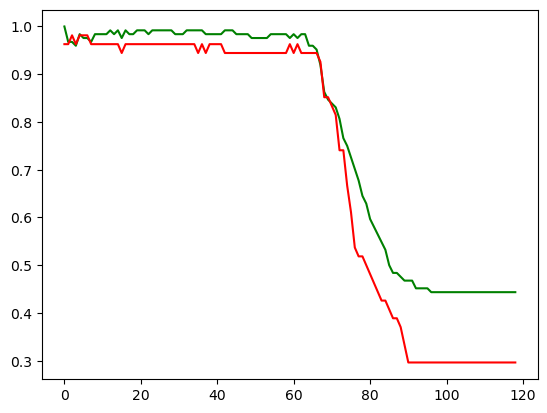

In [280]:
sns.lineplot(train_acc_list, color = 'green')
sns.lineplot(test_acc_list, color = 'red')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

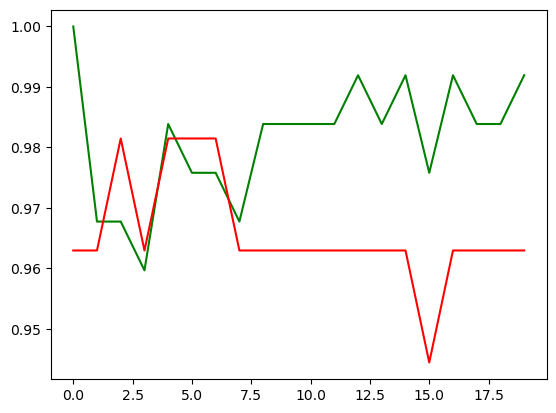

In [282]:
train_acc_list = train_acc_list[:20]
test_acc_list = test_acc_list[:20]
sns.lineplot(train_acc_list, color = 'green')
sns.lineplot(test_acc_list, color = 'red')
plt.show()

In [288]:
#squareroot{number of rows}

In [292]:
pipe = Pipeline(steps=[
    ('scaling', StandardScaler()),
    ('model', KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree', leaf_size = 20))
])

In [294]:
kfold = KFold(n_splits=10, shuffle=True, random_state=31)

In [296]:
param_grid = {
    'model__n_neighbors': range(1,20),
    'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [298]:
param_grid = {
    'model__n_neighbors': range(1,20),
    'model__leaf_size': range(1,30)
}

In [300]:
grid_search = GridSearchCV(estimator=pipe, cv = kfold, param_grid = param_grid, scoring = 'accuracy')

In [302]:
grid_search.fit(train_X, train_y)

GridSearchCV(cv=KFold(n_splits=10, random_state=31, shuffle=True),
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('model',
                                        KNeighborsClassifier(algorithm='kd_tree',
                                                             leaf_size=20))]),
             param_grid={'model__leaf_size': range(1, 30),
                         'model__n_neighbors': range(1, 20)},
             scoring='accuracy')

In [306]:
grid_search.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='kd_tree', leaf_size=1,
                                      n_neighbors=9))])

In [308]:
grid_search.best_params_

{'model__leaf_size': 1, 'model__n_neighbors': 9}

In [226]:
train_best_param_pred = grid_search.best_estimator_.predict(train_X)
test_best_param_pred = grid_search.best_estimator_.predict(test_X)

In [206]:
print(classification_report(train_y, train_best_param_pred))

              precision    recall  f1-score   support

           1       0.97      1.00      0.99        37
           2       1.00      0.96      0.98        55
           3       0.97      1.00      0.98        32

    accuracy                           0.98       124
   macro avg       0.98      0.99      0.98       124
weighted avg       0.98      0.98      0.98       124



In [208]:
print(classification_report(test_y, test_best_param_pred))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        22
           2       1.00      0.88      0.93        16
           3       0.94      1.00      0.97        16

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54

